In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_excel("Expenditure_OperatingRevenue_students.xlsx")
#小心 does not print all rows!!!
df.head()

,financial_year,actual_revised_estimated,sector,ministry,type,amount,percent_of_gdp
0,1997,Actual,Social Development,Education,Operating,3348,0.022
1,1998,Actual,Social Development,Education,Operating,3167,0.022
2,1999,Actual,Social Development,Education,Operating,3257,0.022
3,2000,Actual,Social Development,Education,Operating,4277,0.025
4,2001,Actual,Social Development,Education,Operating,4767,0.030


In [3]:
arr_ministries = np.unique(df["ministry"].to_numpy())

In [4]:
expenditure = []
for ministry in arr_ministries:
    expenditure.append(np.sum(df[df["ministry"] == ministry]['amount'].to_numpy()))

In [5]:
arr_expenditure = np.array(expenditure)

C:\Users\uchen_avctbcy\AppData\Local\Temp\ipykernel_4720\3273098511.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(arr_ministries, rotation=70, ha='right')


[Text(0, 0, 'Communications and Information'),
 Text(1, 0, 'Culture, Community and Youth'),
 Text(2, 0, 'Defence'),
 Text(3, 0, 'Education'),
 Text(4, 0, 'Finance'),
 Text(5, 0, 'Foreign Affairs'),
 Text(6, 0, 'Health'),
 Text(7, 0, 'Home Affairs'),
 Text(8, 0, 'Info-Communications and Media Development'),
 Text(9, 0, 'Law'),
 Text(10, 0, 'Manpower'),
 Text(11, 0, 'National Development'),
 Text(12, 0, 'Organs of State'),
 Text(13, 0, "Prime Minister's Office"),
 Text(14, 0, 'Social and Family Development'),
 Text(15, 0, 'Sustainability and the Environment'),
 Text(16, 0, 'Trade and Industry'),
 Text(17, 0, 'Transport')]

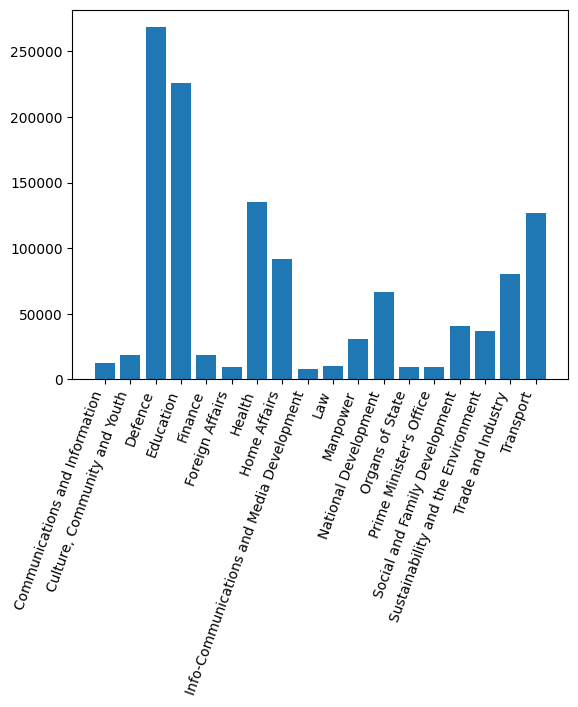

In [6]:
fig, ax = plt.subplots()
ax.bar(arr_ministries, arr_expenditure)

ax.set_xticklabels(arr_ministries, rotation=70, ha='right')

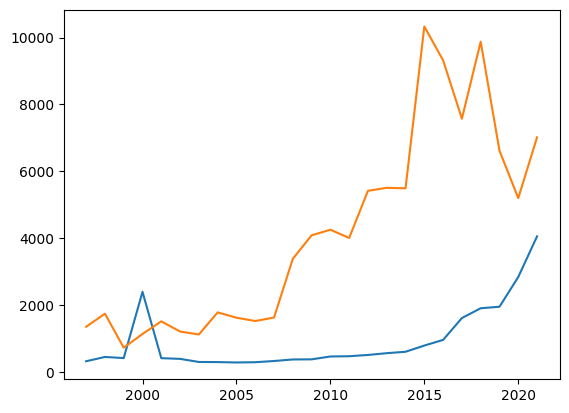

In [8]:
fig, ax = plt.subplots()
ax.plot(\
df[(df['ministry']=='Transport') & (df['type']=='Operating')]['financial_year'],\
df[(df['ministry']=='Transport') & (df['type']=='Operating')]['amount'])
ax.plot(\
df[ (df['ministry']=='Transport') & (df['type']=='Development') ]['financial_year'],\
df[ (df['ministry']=='Transport') & (df['type']=='Development') ]['amount'])

### Which ministry incurred the highest annual expenditure? When did this occur? How much was the expenditure?

In [63]:
annual_exp = df[df['type']=='Operating']['amount'].to_numpy() + df[df['type']=='Development']['amount'].to_numpy()


In [64]:
print('max value = ',np.max(annual_exp))
print('index =', np.argmax(annual_exp))

max value =  18845
index = 74


In [65]:
df[df['type']=='Operating'].iloc[74]

financial_year                            2021
actual_revised_estimated             Estimated
sector                      Social Development
ministry                                Health
type                                 Operating
amount                                   17355
percent_of_gdp                           0.034
Name: 124, dtype: object

### Which sector incurred the highest annual expenditure? When did this occur? How much was the expenditure?

In [26]:
arr_sectors = np.unique(df["sector"].to_numpy())

for sector in arr_sectors:
    arr_ministries = np.unique(df[df["sector"]==sector]['ministry'].to_numpy())
    df_sector = df[df["sector"]==sector]
    
    annual = np.zeros(df_sector[(df_sector["ministry"]==arr_ministries[0])&(df_sector['type']=='Operating')]['amount'].to_numpy().size)
    for ministry in arr_ministries:
        annual += df_sector[(df_sector['ministry']==ministry)&(df_sector['type']=='Operating')]['amount'].to_numpy()
    print('Sector:',sector)
    print('Maximum Annual:', np.max(annual))
    print('Year', np.argmax(annual) + 1997)
    print()

Sector: Economic Development
Maximum Annual: 12412.0
Year 2021

Sector: Government Administration
Maximum Annual: 3769.0
Year 2021

Sector: Security and External Relations
Maximum Annual: 21768.0
Year 2021

Sector: Social Development
Maximum Annual: 44517.0
Year 2021



# References and Quick Tutorials

https://www.pythoncharts.com/matplotlib/rotating-axis-labels/  
https://pandas.pydata.org/docs/user_guide/indexing.html

### Using index
Notice the reindexing after filtering! Index does not match original


In [27]:
df[df['type']=='Operating']

,financial_year,actual_revised_estimated,sector,ministry,type,amount,percent_of_gdp
0,1997,Actual,Social Development,Education,Operating,3348,0.022
1,1998,Actual,Social Development,Education,Operating,3167,0.022
2,1999,Actual,Social Development,Education,Operating,3257,0.022
3,2000,Actual,Social Development,Education,Operating,4277,0.025
4,2001,Actual,Social Development,Education,Operating,4767,0.030
...,...,...,...,...,...,...,...
920,2017,Actual,Government Administration,Prime Minister's Office,Operating,653,0.001
921,2018,Actual,Government Administration,Prime Minister's Office,Operating,670,0.001
922,2019,Actual,Government Administration,Prime Minister's Office,Operating,746,0.001
923,2020,Revised,Government Administration,Prime Minister's Office,Operating,798,0.002


In [19]:
df.iloc[74]

financial_year                              2021
actual_revised_estimated               Estimated
sector                        Social Development
ministry                    National Development
type                                   Operating
amount                                      4149
percent_of_gdp                             0.008
Name: 74, dtype: object

In [18]:
df[df['type']=='Operating'].iloc[74]

financial_year                            2021
actual_revised_estimated             Estimated
sector                      Social Development
ministry                                Health
type                                 Operating
amount                                   17355
percent_of_gdp                           0.034
Name: 124, dtype: object

### Two ways of selecting a column + filtering

In [12]:
df.loc[df['type']=='Operating','amount']

0      3348
1      3167
2      3257
3      4277
4      4767
       ... 
920     653
921     670
922     746
923     798
924     973
Name: amount, Length: 475, dtype: int64

In [13]:
df[df['type']=='Operating']['amount']

0      3348
1      3167
2      3257
3      4277
4      4767
       ... 
920     653
921     670
922     746
923     798
924     973
Name: amount, Length: 475, dtype: int64

### Filtering with multiple parameters

notice how the indexing follows that of original!

In [14]:
df[(df['ministry']=='Transport') & (df['type']=='Operating')]['amount']

600     314
601     442
602     409
603    2390
604     406
605     385
606     292
607     289
608     277
609     285
610     321
611     367
612     371
613     456
614     464
615     502
616     555
617     598
618     783
619     953
620    1607
621    1900
622    1945
623    2835
624    4051
Name: amount, dtype: int64

In [16]:
df[df['ministry']=='Transport'][df['type']=='Operating']['amount']

C:\Users\uchen_avctbcy\AppData\Local\Temp\ipykernel_4720\870235389.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['ministry']=='Transport'][df['type']=='Operating']['amount']


600     314
601     442
602     409
603    2390
604     406
605     385
606     292
607     289
608     277
609     285
610     321
611     367
612     371
613     456
614     464
615     502
616     555
617     598
618     783
619     953
620    1607
621    1900
622    1945
623    2835
624    4051
Name: amount, dtype: int64

In [22]:
annual

array([ 5479.,  5432.,  5410.,  6654.,  7771.,  7945.,  8615.,  8500.,
        8777., 10521., 11474., 13201., 14714., 16460., 18056., 18495.,
       20943., 22611., 26259., 28939., 30849., 31399., 32048., 43140.,
       44517.])